In [ ]:
print(312.66 + 239.28 + 96.28)

In [ ]:
312.66 + 239.28 + 96.28

In [ ]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Parse the network XML
tree = ET.parse('M50network.net.xml')
root = tree.getroot()

# Set the figure size (width, height)
plt.figure(figsize=(10,10))

# Plot network lanes
for lane in root.findall(".//lane"):
    shape = lane.get("shape").split()
    x_coords, y_coords = zip(*[map(float, coord.split(",")) for coord in shape])
    plt.plot(x_coords, y_coords, 'k-', linewidth=2)  # 'k-' gives black lines

# Set aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("output_filename.pdf", format='pdf', dpi=600)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import plotly.graph_objects as go

# Parse the network XML
tree = ET.parse('M50network.net.xml')
root = tree.getroot()

# Set the figure size (width, height)
plt.figure(figsize=(30,30))

# For collecting coordinates for plotly
lines = []

# Plot network lanes
for lane in root.findall(".//lane"):
    shape = lane.get("shape").split()
    x_coords, y_coords = zip(*[map(float, coord.split(",")) for coord in shape])
    plt.plot(x_coords, y_coords, color='grey', linewidth=2)  # grey color lines
    lines.append(go.Scatter(x=x_coords, y=y_coords, mode='lines', line=dict(color='grey', width=2)))

# Set aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Optional zoom (replace with your desired coordinates if needed)
use_zoom = False  # Set to True if zoom is needed
if use_zoom:
    min_x, max_x = -100, 100
    min_y, max_y = -100, 100
    plt.xlim([min_x, max_x])
    plt.ylim([min_y, max_y])

# Save the matplotlib plot as PDF
plt.savefig("output_filename_matplotlib.pdf", format='pdf', dpi=600)

# Display the matplotlib plot
plt.show()

# Plotly interactive plot with adjusted aspect ratio
layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    xaxis_title="X Coordinate",
    yaxis_title="Y Coordinate",
    xaxis=dict(scaleanchor="y"),  # This ensures x and y axis have the same scale
)

if use_zoom:
    layout['xaxis']['range'] = [min_x, max_x]
    layout['yaxis']['range'] = [min_y, max_y]

fig = go.Figure(data=lines, layout=layout)
fig.write_html("output_filename_plotly.html")  # Saves interactive plot as an HTML


In [ ]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import plotly.graph_objects as go

# Parse the network XML
tree = ET.parse('M50network.net.xml')
root = tree.getroot()

# Read the edges from the text file
with open('edges_near_stopped_taxis.txt', 'r') as file:
    red_edges = [line.strip() for line in file]

# Set the figure size (width, height)
plt.figure(figsize=(20,20))

# For collecting coordinates for plotly
lines = []

# Plot network lanes by iterating over edges
for edge in root.findall(".//edge"):
    edge_id = edge.get('id')
    for lane in edge.findall(".//lane"):
        shape = lane.get("shape").split()
        x_coords, y_coords = zip(*[map(float, coord.split(",")) for coord in shape])
        
        # Check if the current edge ID is in the list of red edges
        if edge_id in red_edges:
            plt.plot(x_coords, y_coords, color='red', linewidth=2)
            lines.append(go.Scatter(x=x_coords, y=y_coords, mode='lines', line=dict(color='red', width=2)))
        else:
            plt.plot(x_coords, y_coords, color='grey', linewidth=2)
            lines.append(go.Scatter(x=x_coords, y=y_coords, mode='lines', line=dict(color='grey', width=2)))

# Set aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Optional zoom (replace with your desired coordinates if needed)
use_zoom = False  # Set to True if zoom is needed
if use_zoom:
    min_x, max_x = -100, 100
    min_y, max_y = -100, 100
    plt.xlim([min_x, max_x])
    plt.ylim([min_y, max_y])

# Save the matplotlib plot as PDF
plt.savefig("output_filename_matplotlib.pdf", format='pdf', dpi=600)

# Display the matplotlib plot
plt.show()

# Plotly interactive plot with adjusted aspect ratio
layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    xaxis_title="X Coordinate",
    yaxis_title="Y Coordinate",
    xaxis=dict(scaleanchor="y"),  # This ensures x and y axis have the same scale
)

if use_zoom:
    layout['xaxis']['range'] = [min_x, max_x]
    layout['yaxis']['range'] = [min_y, max_y]

fig = go.Figure(data=lines, layout=layout)
fig.write_html("output_filename_plotly.html")  # Saves interactive plot as an HTML


removing plotly for now

In [ ]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Parse the network XML
tree = ET.parse('M50network.net.xml')
root = tree.getroot()

# Read the edges from the text file and remove the 'edge:' prefix
with open('edges_near_stopped_taxis.txt', 'r') as file:
    red_edges = [line.strip().replace('edge:', '') for line in file]

# Set the figure size (width, height)
plt.figure(figsize=(20,20))

# Plot network lanes by iterating over edges
for edge in root.findall(".//edge"):
    edge_id = edge.get('id')
    for lane in edge.findall(".//lane"):
        shape = lane.get("shape").split()
        x_coords, y_coords = zip(*[map(float, coord.split(",")) for coord in shape])
        
        # Check if the current edge ID is in the list of red edges
        if edge_id in red_edges:
            plt.plot(x_coords, y_coords, color='red', linewidth=2)
        else:
            plt.plot(x_coords, y_coords, color='grey', linewidth=2)

# Set aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Optional zoom (replace with your desired coordinates if needed)
use_zoom = False  # Set to True if zoom is needed
if use_zoom:
    min_x, max_x = -100, 100
    min_y, max_y = -100, 100
    plt.xlim([min_x, max_x])
    plt.ylim([min_y, max_y])

# Save the matplotlib plot as PDF
plt.savefig("output_filename_matplotlib_1200.pdf", format='pdf', dpi=1200)

# Display the matplotlib plot
plt.show()


adding stopped vehicles from stopped_vehicles.csv

In [ ]:
import csv
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Parse the network XML
tree = ET.parse('M50network.net.xml')
root = tree.getroot()

# Read the edges from the text file and remove the 'edge:' prefix
with open('edges_near_stopped_taxis.txt', 'r') as file:
    red_edges = [line.strip().replace('edge:', '') for line in file]

# Read the CSV data into a list of dictionaries
vehicle_positions = []
with open('stopped_vehicles.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        vehicle_positions.append({
            'vehicle_id': row['vehicle_id'],
            'slowdown_issued': float(row['slowdown_issued']),
            'actual_stop_time': float(row['actual_stop_time']),
            'position_x': float(row['position_x']),
            'position_y': float(row['position_y'])
        })

# Set the figure size (width, height)
plt.figure(figsize=(20,20))

# Plot network lanes by iterating over edges
for edge in root.findall(".//edge"):
    edge_id = edge.get('id')
    for lane in edge.findall(".//lane"):
        shape = lane.get("shape").split()
        x_coords, y_coords = zip(*[map(float, coord.split(",")) for coord in shape])
        
        # Check if the current edge ID is in the list of red edges
        if edge_id in red_edges:
            plt.plot(x_coords, y_coords, color='orange', linewidth=3)
        else:
            plt.plot(x_coords, y_coords, color='grey', linewidth=2)

# Option to toggle circle drawing
draw_circles = True  # Set to False if you don't want to draw circles around vehicle dots

# Plot vehicle positions AFTER plotting network lanes
for vehicle in vehicle_positions:
    plt.scatter(vehicle['position_x'], vehicle['position_y'], color='darkred', s=50, zorder=3)  # darkred for dark red color
    
    # Drawing circles of radius 250 around vehicle dots if the option is True
    if draw_circles:
        circle = plt.Circle((vehicle['position_x'], vehicle['position_y']), 250, color='darkred', fill=False, zorder=2)
        plt.gca().add_artist(circle)
        
# Set aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Optional zoom (replace with your desired coordinates if needed)
use_zoom = False  # Set to True if zoom is needed
if use_zoom:
    min_x, max_x = -100, 100
    min_y, max_y = -100, 100
    plt.xlim([min_x, max_x])
    plt.ylim([min_y, max_y])

# Save the matplotlib plot as PDF
plt.savefig("output_filename_matplotlib_1200.pdf", format='pdf', dpi=1200)

# Display the matplotlib plot
plt.show()


testing traci.lane.getshape() function

In [5]:
import os
import sys
import math

# output of shape = traci.lane.getShape(lane_id) gives centre line coordinates of the lane start and end positions

try:
    import traci
    print("TraCI module imported successfully. SUMO is being used from the virtual environment.")
except ImportError:
    print("TraCI module could not be imported. SUMO is not installed in the virtual environment.")


# Check SUMO_HOME environment variable
if 'SUMO_HOME' in os.environ:
    tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
    sys.path.append(tools)
else:   
    sys.exit("Please declare the environment variable 'SUMO_HOME'")

sumoBinary = "sumo"  # Use "sumo" for non-GUI version
sumoCmd = [sumoBinary, "-c", "fivebyfive-inputs/fivebyfive.sumocfg"]

def run():
    step = 0
    while step < 10:
        traci.simulationStep()  # Run one simulation step
        lane_ids = traci.lane.getIDList()  # Get all lane IDs
        for lane_id in lane_ids:
            if lane_id[0] != ':': 
                shape = traci.lane.getShape(lane_id)  # Get the shape of each lane
                print(f"Lane ID: {lane_id}, Shape: {shape}")
                x, y = (50, 100)
                # distance = ((x - shape[0][0])**2 + (y - shape[0][1])**2)**0.5
                distance1 = ((x - shape[0])**2 + (y - shape[1])**2)**0.5
                print(distance1)
        step += 1

    traci.close()  # Close the TraCI connection

# Check for connection
traci.start(sumoCmd) 
run()

TraCI module imported successfully. SUMO is being used from the virtual environment.
 Retrying in 1 seconds
Lane ID: A0A1_0, Shape: ((-1.6, 3.2), (-1.6, 192.8))


TypeError: unsupported operand type(s) for -: 'int' and 'tuple'

In [4]:
((50+1.6)**2 + (100-192.8)**2)**0.5

106.18097758073242

testing moving average function

The network returns back to normal at time step: 8083.0


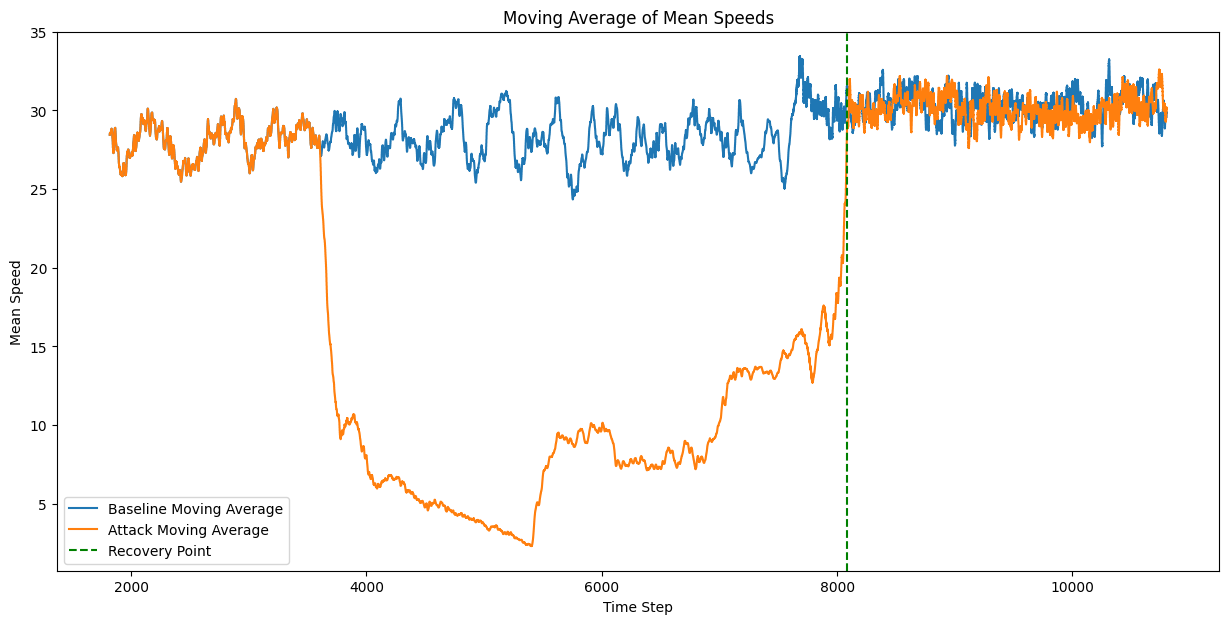

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files and store them in DataFrames
df1 = pd.read_csv('base_mean_speeds.csv')
df2 = pd.read_csv('attack_mean_speeds.csv')

# Merge the two DataFrames based on 'Step'
df = pd.merge(df1, df2, on='Step')

# Calculate moving averages
window_size = 300  # Number of steps to include in moving average
df['attack_moving_avg'] = df['Attack_Mean_Speed_All'].rolling(window=window_size).mean()
df['baseline_moving_avg'] = df['Base_Mean_Speed_All'].rolling(window=window_size).mean()

# Determine the starting point of the attack, you might want to define this based on your dataset
attack_end_time_step = 5400 # Or another specific start time if known

# Find where the attack moving average is within the threshold of the baseline
threshold = 0.1  # 10% threshold
within_threshold = ((df['attack_moving_avg'] - df['baseline_moving_avg']).abs() <= threshold * df['baseline_moving_avg']) & (df['Step'] > attack_end_time_step)

# Ensure we have at least one point that meets the condition, otherwise set recovery_time_step to None
if within_threshold.any():
    recovery_time_step = df[within_threshold]['Step'].iloc[0]
else:
    recovery_time_step = None

if recovery_time_step is not None:
    print(f"The network returns back to normal at time step: {recovery_time_step}")
else:
    print("No recovery point found within the threshold after the attack started.")

# Plot the moving averages
plt.figure(figsize=(15, 7))
plt.plot(df['Step'], df['baseline_moving_avg'], label='Baseline Moving Average')
plt.plot(df['Step'], df['attack_moving_avg'], label='Attack Moving Average')

if recovery_time_step is not None:
    plt.axvline(x=recovery_time_step, color='green', linestyle='--', label='Recovery Point')

plt.title('Moving Average of Mean Speeds')
plt.xlabel('Time Step')
plt.ylabel('Mean Speed')
plt.legend()
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (2,).

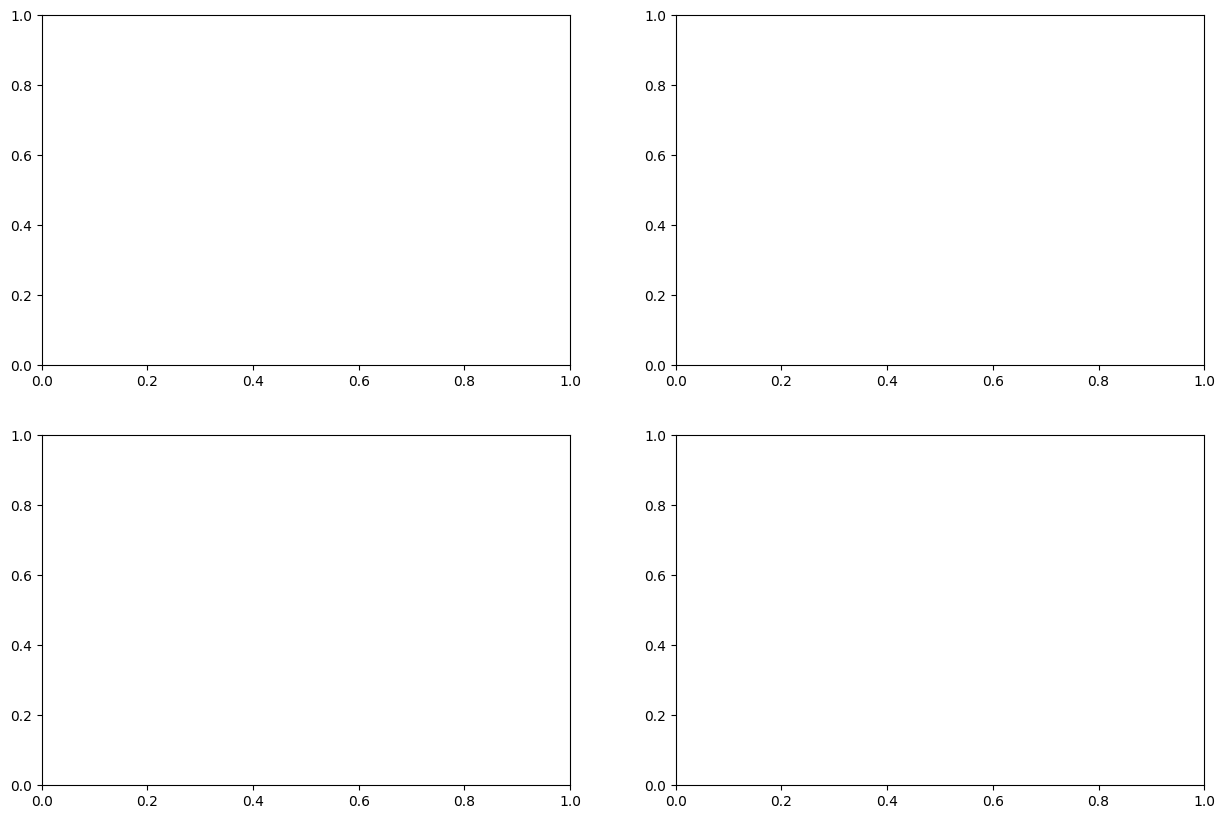

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
categories = ['Mean speed (km/h)', 'Mean count (veh)', 'Density (veh/km)', 'V/C ratio']
baseline_network = [29, 107, 6.4, 0.11]
attack_network = [23, 131, 8.1, 0.11]
baseline_radius = [27, 12, 7.9, 0.12]
attack_radius = [9, 30, 20.5, 0.07]

# Define the label locations and bar width
x = np.arange(len(baseline_network))  # number of categories
bar_width = 0.2  # set smaller bar width for grouped bar chart

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Create 2x2 subplots

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Iterate over the flattened axes
for idx, ax in enumerate(axs):
    # Plot bars for 'Network' and 'Within Radius' side by side
    ax.bar(x - bar_width/2, [baseline_network[idx], baseline_radius[idx]], width=bar_width, label='Baseline')
    ax.bar(x + bar_width/2, [attack_network[idx], attack_radius[idx]], width=bar_width, label='Attack')

    # Set labels and titles
    ax.set_ylabel(categories[idx])
    ax.set_title(f'{categories[idx]} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(['Network', 'Within Radius'])
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


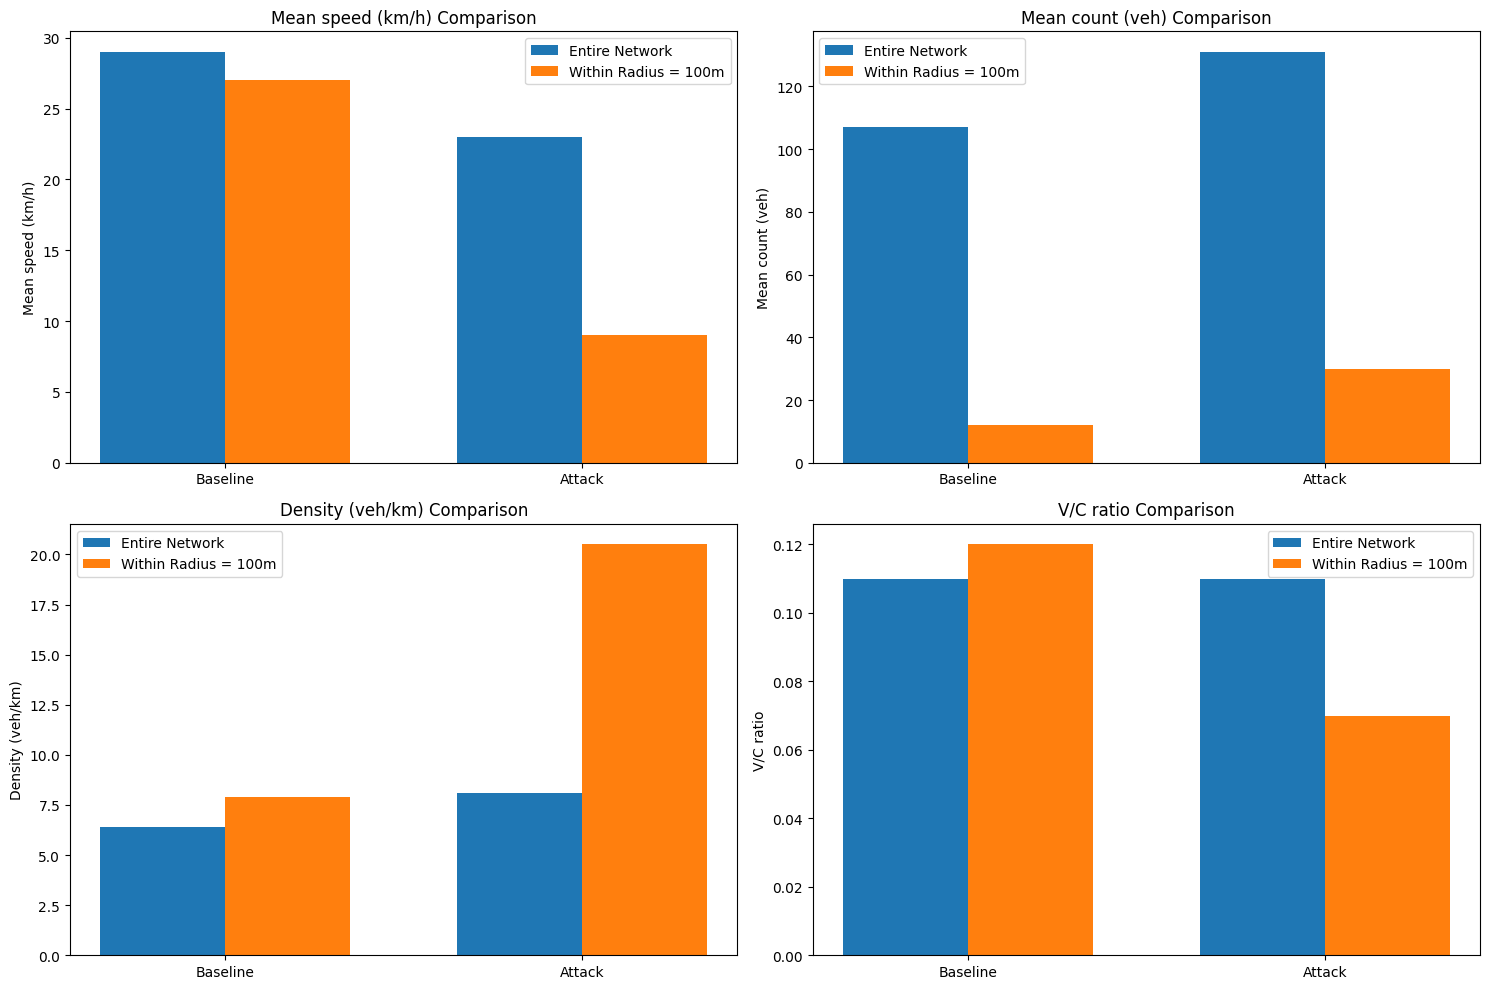

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
categories = ['Mean speed (km/h)', 'Mean count (veh)', 'Density (veh/km)', 'V/C ratio']
baseline_network = [29, 107, 6.4, 0.11]
attack_network = [23, 131, 8.1, 0.11]
baseline_radius = [27, 12, 7.9, 0.12]
attack_radius = [9, 30, 20.5, 0.07]

# Define the label locations and bar width
x = np.arange(2)  # We have two groups: Network and Within Radius
bar_width = 0.35  # Width of the bars

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Create 2x2 subplots
axs = axs.ravel()  # Flatten the array for easy indexing

# Iterate over the number of categories
for i in range(len(categories)):
    # Calculate positions for each group
    network_pos = x - bar_width / 2
    radius_pos = x + bar_width / 2

    # Plot the 'Network' bars
    axs[i].bar(network_pos, [baseline_network[i], attack_network[i]], width=bar_width, label='Entire Network')

    # Plot the 'Within Radius' bars
    axs[i].bar(radius_pos, [baseline_radius[i], attack_radius[i]], width=bar_width, label='Within Radius = 100m')

    # Set labels and titles
    axs[i].set_ylabel(categories[i])
    axs[i].set_title(f'{categories[i]} Comparison')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(['Baseline', 'Attack'])
    axs[i].legend()

plt.tight_layout()
plt.show()


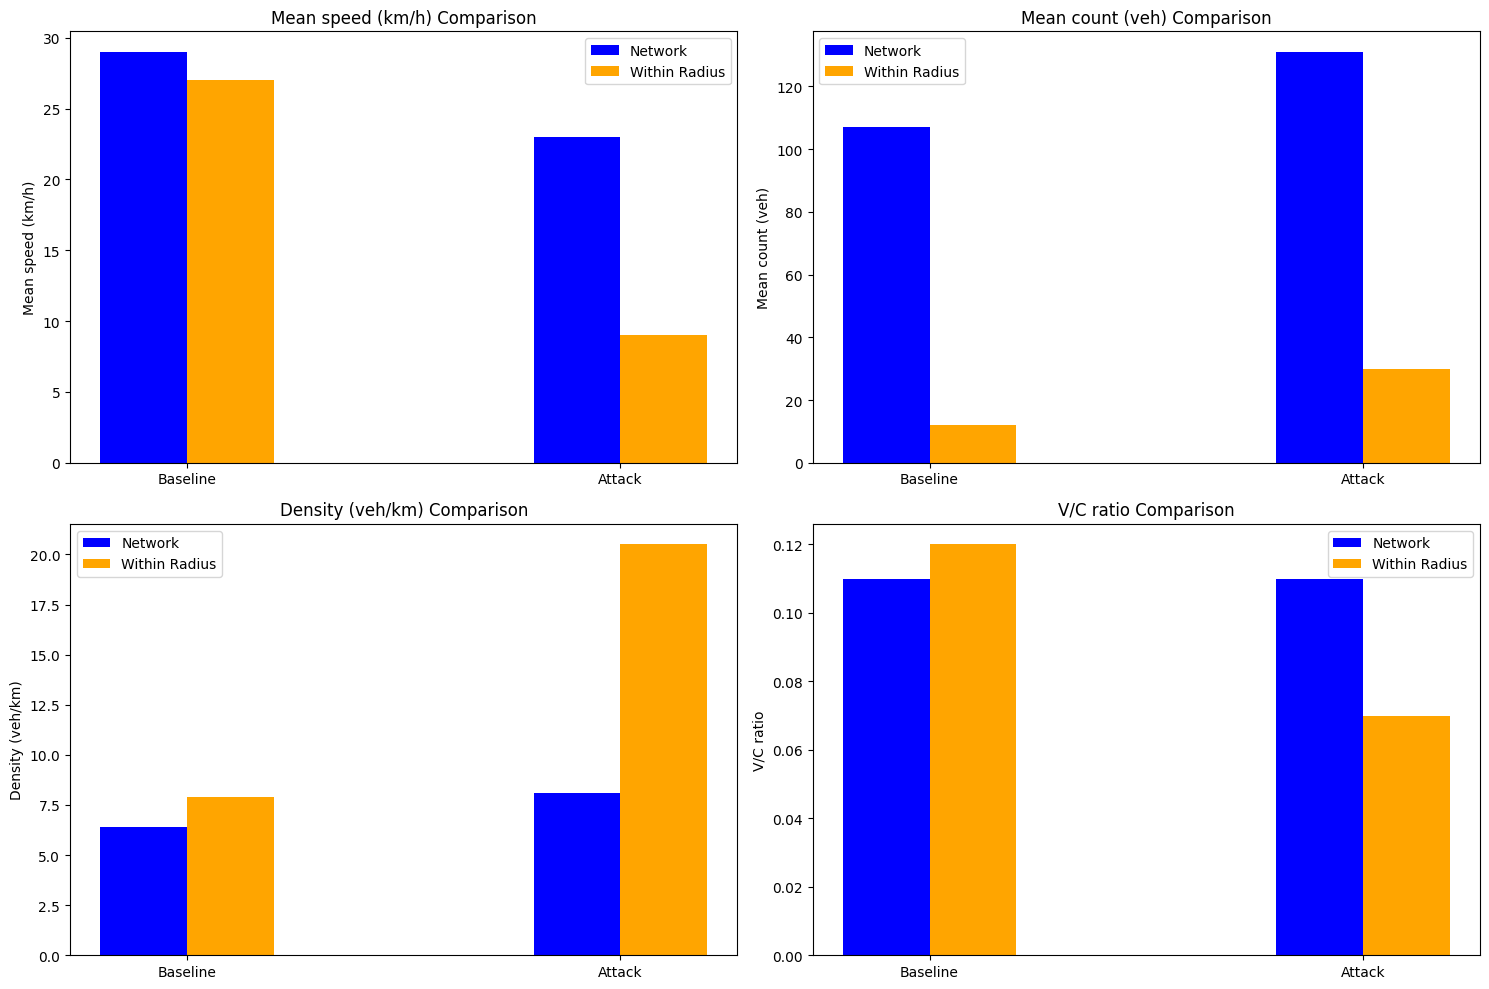

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
categories = ['Mean speed (km/h)', 'Mean count (veh)', 'Density (veh/km)', 'V/C ratio']
baseline_network = [29, 107, 6.4, 0.11]
attack_network = [23, 131, 8.1, 0.11]
baseline_radius = [27, 12, 7.9, 0.12]
attack_radius = [9, 30, 20.5, 0.07]

# Define the label locations and bar width
n_groups = 2  # We have two groups: Baseline and Attack
bar_width = 0.20  # Width of the bars

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Create 2x2 subplots
axs = axs.ravel()  # Flatten the array for easy indexing

# Create a set of positions for the groups
group_positions = np.arange(n_groups)

# Iterate over the number of categories
for i in range(len(categories)):
    # Calculate positions for the 'Network' and 'Within Radius' within each scenario
    network_pos = group_positions - bar_width / 2
    radius_pos = group_positions + bar_width / 2

    # Plot the 'Network' bars
    axs[i].bar(network_pos, [baseline_network[i], attack_network[i]], bar_width, label='Network', color='blue')

    # Plot the 'Within Radius' bars
    axs[i].bar(radius_pos, [baseline_radius[i], attack_radius[i]], bar_width, label='Within Radius', color='orange')

    # Set labels and titles
    axs[i].set_ylabel(categories[i])
    axs[i].set_title(f'{categories[i]} Comparison')
    axs[i].set_xticks(group_positions)
    axs[i].set_xticklabels(['Baseline', 'Attack'])
    axs[i].legend()

plt.tight_layout()
plt.show()


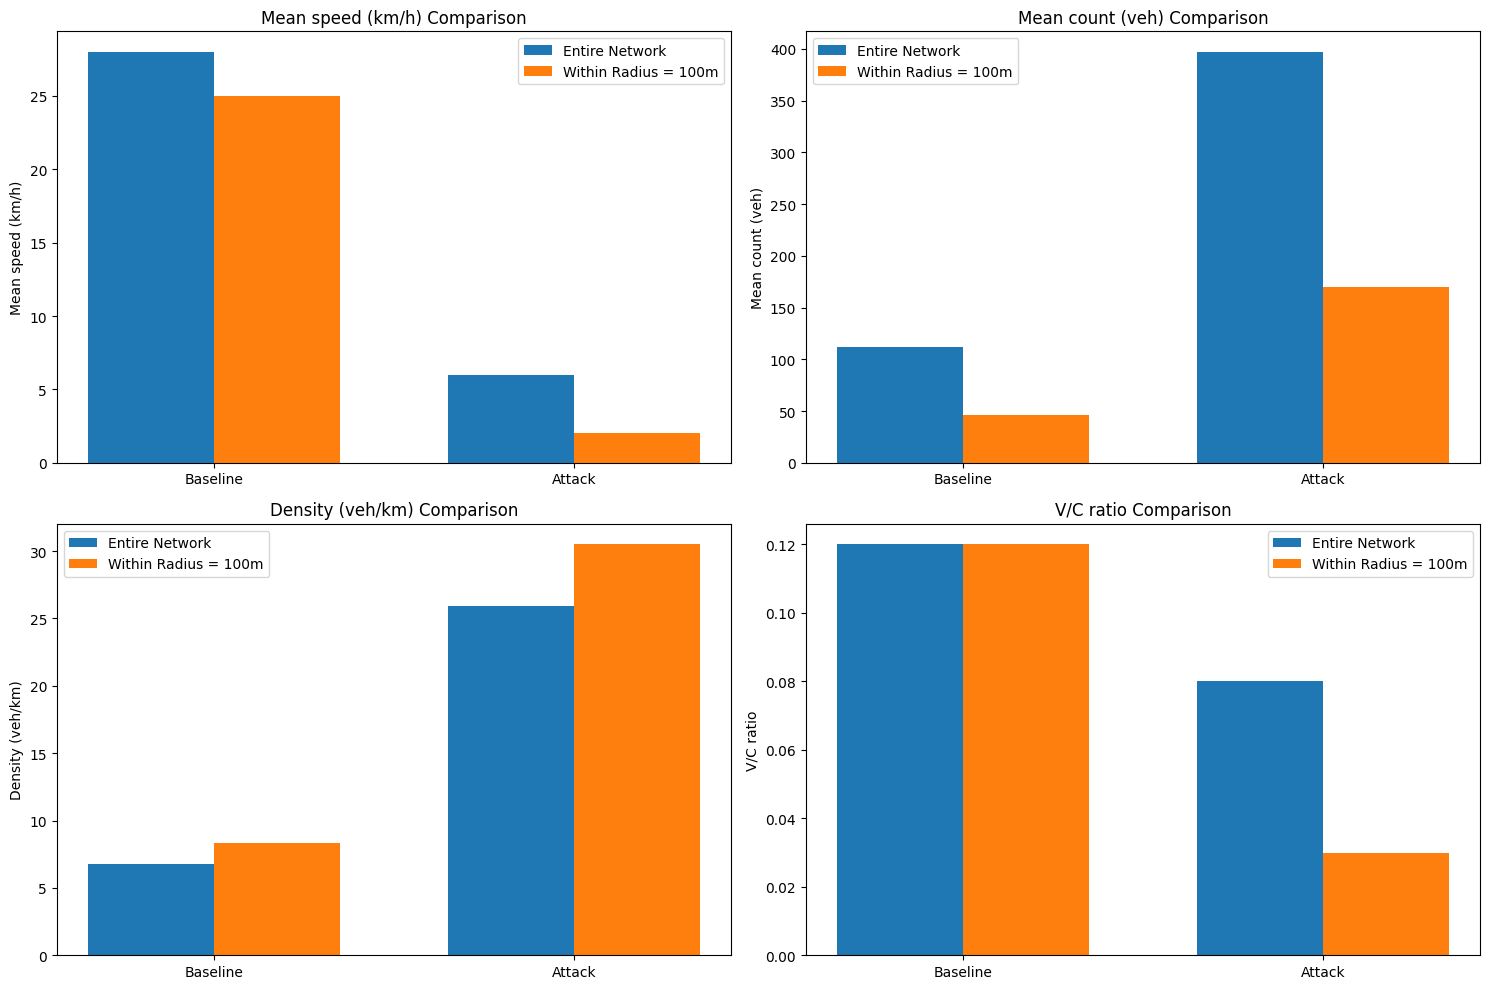

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
categories = ['Mean speed (km/h)', 'Mean count (veh)', 'Density (veh/km)', 'V/C ratio']
baseline_network = [28, 112, 6.8, 0.12]
attack_network = [6, 397, 25.9, 0.08]
baseline_radius = [25, 46, 8.3, 0.12]
attack_radius = [2, 170, 30.5, 0.03]

# Define the label locations and bar width
x = np.arange(2)  # We have two groups: Network and Within Radius
bar_width = 0.35  # Width of the bars

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Create 2x2 subplots
axs = axs.ravel()  # Flatten the array for easy indexing

# Iterate over the number of categories
for i in range(len(categories)):
    # Calculate positions for each group
    network_pos = x - bar_width / 2
    radius_pos = x + bar_width / 2

    # Plot the 'Network' bars
    axs[i].bar(network_pos, [baseline_network[i], attack_network[i]], width=bar_width, label='Entire Network')

    # Plot the 'Within Radius' bars
    axs[i].bar(radius_pos, [baseline_radius[i], attack_radius[i]], width=bar_width, label='Within Radius = 100m')

    # Set labels and titles
    axs[i].set_ylabel(categories[i])
    axs[i].set_title(f'{categories[i]} Comparison')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(['Baseline', 'Attack'])
    axs[i].legend()

plt.tight_layout()
plt.show()


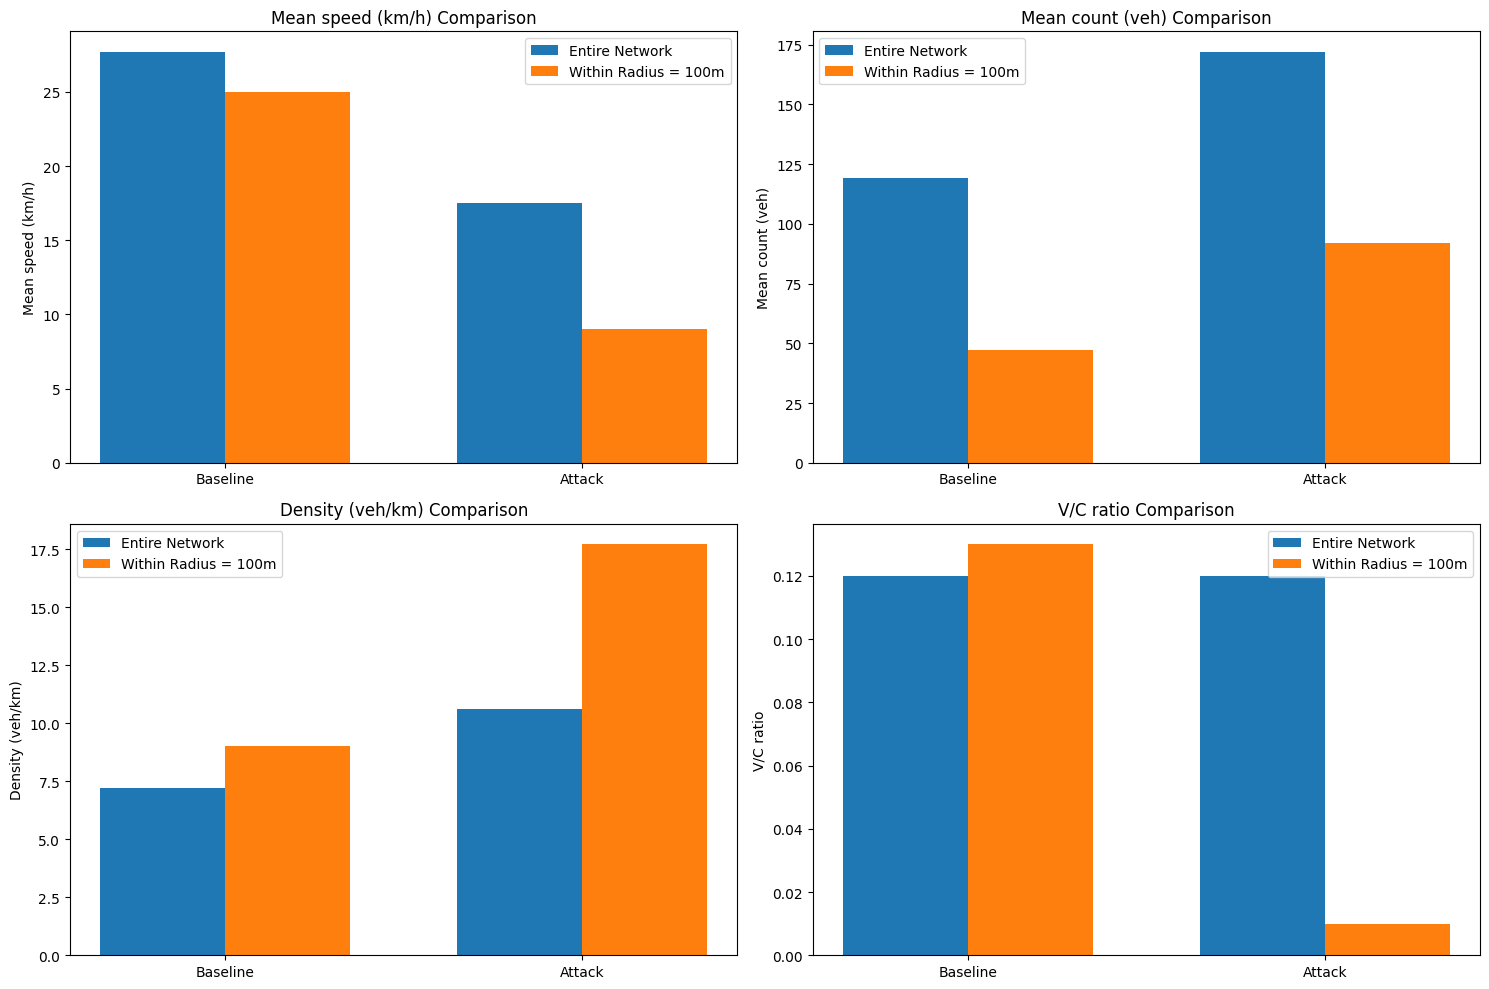

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
categories = ['Mean speed (km/h)', 'Mean count (veh)', 'Density (veh/km)', 'V/C ratio']
baseline_network = [27.7, 119, 7.2, 0.12]
attack_network = [17.5, 172, 10.6, 0.12]
baseline_radius = [25, 47, 9, 0.13]
attack_radius = [9, 92, 17.7, 0.01]

# Define the label locations and bar width
x = np.arange(2)  # We have two groups: Network and Within Radius
bar_width = 0.35  # Width of the bars

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Create 2x2 subplots
axs = axs.ravel()  # Flatten the array for easy indexing

# Iterate over the number of categories
for i in range(len(categories)):
    # Calculate positions for each group
    network_pos = x - bar_width / 2
    radius_pos = x + bar_width / 2

    # Plot the 'Network' bars
    axs[i].bar(network_pos, [baseline_network[i], attack_network[i]], width=bar_width, label='Entire Network')

    # Plot the 'Within Radius' bars
    axs[i].bar(radius_pos, [baseline_radius[i], attack_radius[i]], width=bar_width, label='Within Radius = 100m')

    # Set labels and titles
    axs[i].set_ylabel(categories[i])
    axs[i].set_title(f'{categories[i]} Comparison')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(['Baseline', 'Attack'])
    axs[i].legend()

plt.tight_layout()
plt.show()


Comparing attack and base lane metrics to get radius of impact as an output

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files and store them in DataFrames
df1 = pd.read_csv('base_lane_metrics_all_step.csv')
df2 = pd.read_csv('attack_lane_metrics_all_step.csv')

# Merge the two DataFrames based on 'Step'
df = pd.merge(df1, df2, on=['Step', 'Lane'], indicator=True, suffixes=('_base', '_attack'))

# save df to csv
df.to_csv('base_attack_lane_metrics_all_step.csv', index=False)

print(df.head())

     Step    Lane  Speed_base  Density_base  VC_Ratio_base  Speed_attack  \
0  1800.0  A0A1_0   23.357980      5.274262       0.072468     23.357980   
1  1800.0  A0B0_0   36.006491      5.274262       0.111710     36.006491   
2  1800.0  A1A0_0   47.791156      5.274262       0.148272     47.791156   
3  1800.0  A1A2_0   54.321079      5.387931       0.172164     54.321079   
4  1800.0  A1B1_0   50.004000      0.000000       0.000000     50.004000   

   Density_attack  VC_Ratio_attack _merge  
0        5.274262         0.072468   both  
1        5.274262         0.111710   both  
2        5.274262         0.148272   both  
3        5.387931         0.172164   both  
4        0.000000         0.000000   both  


testing discrepency between recovery time outputs b/w functions

In [2]:
import pandas as pd

def find_and_print_recovery_times(project, scenario, breakdown_time, breakdown_duration, threshold_fraction):
    
    # File path for combined data
    combined_file_path = "combined_speed_count_data.csv"

    # Load the combined data
    combined_data = pd.read_csv(combined_file_path)

    # Calculate the end time of the attack
    attack_end_time = breakdown_time + breakdown_duration

    # Initialize dictionary to store recovery times
    recovery_times = {}

    # Find recovery time for each scenario ('all' and 'in_radius')
    for data_type in ['Mean_Speed_All', 'Mean_Speed_In_Radius']:
        recovery_condition = (combined_data[f'Attack_{data_type}_MA'] >= (1 - threshold_fraction) * combined_data[f'Base_{data_type}_MA']) & (combined_data['Step'] > attack_end_time)
        recovery_times_col = combined_data[recovery_condition]['Step']

        recovery_times[data_type] = recovery_times_col.iloc[0] if not recovery_times_col.empty else None

    # Print the recovery times
    for key, time in recovery_times.items():
        if time is not None:
            print(f"Recovery time for {key}: {time}")
        else:
            print(f"No recovery point found within the threshold for {key} after the attack.")
    
    print (recovery_times)

    return recovery_times

# Find and print recovery times for the 'fivebyfive' project
find_and_print_recovery_times(project='fivebyfive', scenario='base', breakdown_time=3600, breakdown_duration=1800, threshold_fraction=0.1)

Recovery time for Mean_Speed_All: 5633.0
Recovery time for Mean_Speed_In_Radius: 5683.0
{'Mean_Speed_All': 5633.0, 'Mean_Speed_In_Radius': 5683.0}


{'Mean_Speed_All': 5633.0, 'Mean_Speed_In_Radius': 5683.0}

In [10]:
# compare column data in two csv files
import pandas as pd

# File paths for the two CSV files
file1 = "combined_speed_count_data.csv"
file2 = "attack_mean_speeds_MA.csv"

# Load the two CSV files
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# select columns to compare
df1 = df1[['Step', 'Attack_Mean_Speed_All_MA']]
df2 = df2[['Step', 'Attack_Mean_Speed_All_MAs']]

# compare the two dataframes and store the equal rows in dataframe
df_equal = df1[df1.eq(df2)]
print(df_equal)


         Step  Attack_Mean_Speed_All_MA
0      1800.0                       NaN
1      1801.0                       NaN
2      1802.0                       NaN
3      1803.0                       NaN
4      1804.0                       NaN
...       ...                       ...
8996  10796.0                 29.662600
8997  10797.0                 29.644387
8998  10798.0                 29.625388
8999  10799.0                 29.606217
9000  10800.0                 29.588833

[9001 rows x 2 columns]


testing code to get upstream edges using traci

In [1]:
import traci
import os, sys
import math
import sumolib

# Load the network using sumolib
net = sumolib.net.readNet('fivebyfive-inputs/fivebyfive-aws.net.xml')

def setup_sumo(sumo_gui): # this function needs to be refactored 
    try:
        sumo_home = os.environ['SUMO_HOME']
    except KeyError:
        sys.exit("Please declare environment variable 'SUMO_HOME'.")

    tools = os.path.join(sumo_home, 'tools')
    sys.path.append(tools)

    binary_name = 'sumo-gui' if sumo_gui else 'sumo'
    virtual_env = os.environ.get('VIRTUAL_ENV')

    if virtual_env:
        sumo_binary = os.path.join(virtual_env, 'bin', binary_name)
    else:
        sumo_binary = os.path.join("/home/don/.local/bin", binary_name)
        if not os.path.exists(sumo_binary):
            sys.exit(f"The SUMO binary was not found. Please set the 'SUMO_BINARY' environment variable or install SUMO.")

    traci.start([sumo_binary, "-c", "fivebyfive-inputs/fivebyfive.sumocfg"])

def run_simulation():
    DECELERATION_RATE = 4.5  # m/s^2
    issued_slowdown = {}
    vehicle_stop_data = []

    while traci.simulation.getMinExpectedNumber() > 0:
        traci.simulationStep()
        current_time = traci.simulation.getTime()  # Update current_time in each iteration

        upstream_edges = get_upstream_edges(edge_id = "C3D3", distance_limit=1000)

        # Check if the current time is close to 1800, considering simulation time-step
        if current_time == 1800:
            for vehicle_id in traci.vehicle.getIDList():
                if traci.vehicle.getTypeID(vehicle_id) == "taxi":
                    current_speed = traci.vehicle.getSpeed(vehicle_id)
                    time_to_stop = math.ceil(current_speed / DECELERATION_RATE)
                    traci.vehicle.slowDown(vehicle_id, 0, time_to_stop)
                    issued_slowdown[vehicle_id] = current_time

        # Process slowdown after 1800
        if current_time >= 1800:
            for vehicle_id, slowdown_time in list(issued_slowdown.items()):
                if traci.vehicle.getSpeed(vehicle_id) == 0:
                    position = traci.vehicle.getPosition(vehicle_id)
                    stop_data = {
                        'vehicle_id': vehicle_id,
                        'slowdown_issued': slowdown_time,
                        'actual_stop_time': current_time,
                        'position': position
                    }
                    vehicle_stop_data.append(stop_data)
                    traci.vehicle.setStop(vehicle_id, traci.vehicle.getRoadID(vehicle_id), traci.vehicle.getLanePosition(vehicle_id), duration=1800, laneIndex=0, flags=0)
                    del issued_slowdown[vehicle_id]

    traci.close()
    return vehicle_stop_data, upstream_edges  # Return the data after the simulation loop is complete

def get_upstream_edges(edge_id, distance_limit):
    upstream_edges = []
    queue = [(edge_id, 0)]

    while queue:
        current_edge_id, current_distance = queue.pop(0)
        current_edge = net.getEdge(current_edge_id)

        if current_distance <= distance_limit:
            upstream_edges.append(current_edge_id)
            for incoming_edge in current_edge.getFromNode().getIncoming():
                length = incoming_edge.getLength()
                new_distance = current_distance + length
                if new_distance <= distance_limit:
                    queue.append((incoming_edge.getID(), new_distance))

    return upstream_edges


if __name__ == '__main__':
    setup_sumo(False)
    vehicle_stop_data, upstream_edges = run_simulation()

    # Printing vehicle_stop_data
    for vehicle_data in vehicle_stop_data:
        print(vehicle_data)
    
    # Printing upstream_edges
    print(upstream_edges)


 Retrying in 1 seconds


{'vehicle_id': 'flow_taxi-clockwise.0', 'slowdown_issued': 1800.0, 'actual_stop_time': 1805.0, 'position': (286.07487754045536, 601.6)}
['C3D3', 'B3C3', 'C2C3', 'C4C3', 'D3C3', 'A3B3', 'B2B3', 'B4B3', 'C3B3', 'B2C2', 'C1C2', 'C3C2', 'D2C2', 'B4C4', 'C3C4', 'D4C4', 'C3D3', 'D2D3', 'D4D3', 'E3D3', 'A2A3', 'A4A3', 'B3A3', 'A2B2', 'B1B2', 'B3B2', 'C2B2', 'A4B4', 'B3B4', 'C4B4', 'B3C3', 'C2C3', 'C4C3', 'D3C3', 'A2B2', 'B1B2', 'B3B2', 'C2B2', 'B1C1', 'C0C1', 'C2C1', 'D1C1', 'B3C3', 'C2C3', 'C4C3', 'D3C3', 'C2D2', 'D1D2', 'D3D2', 'E2D2', 'A4B4', 'B3B4', 'C4B4', 'B3C3', 'C2C3', 'C4C3', 'D3C3', 'C4D4', 'D3D4', 'E4D4', 'B3C3', 'C2C3', 'C4C3', 'D3C3', 'C2D2', 'D1D2', 'D3D2', 'E2D2', 'C4D4', 'D3D4', 'E4D4', 'D3E3', 'E2E3', 'E4E3', 'A1A2', 'A3A2', 'B2A2', 'A3A4', 'B4A4', 'A3B3', 'B2B3', 'B4B3', 'C3B3', 'A1A2', 'A3A2', 'B2A2', 'A1B1', 'B0B1', 'B2B1', 'C1B1', 'A3B3', 'B2B3', 'B4B3', 'C3B3', 'B2C2', 'C1C2', 'C3C2', 'D2C2', 'A3A4', 'B4A4', 'A3B3', 'B2B3', 'B4B3', 'C3B3', 'B4C4', 'C3C4', 'D4C4', 'A3B3',

In [12]:
import sumolib

# Load the network
net = sumolib.net.readNet('fivebyfive-inputs/fivebyfive-aws.net.xml')


print('abc')

# Iterate through all edges and check if they are internal
for edge in net.getEdges():
    if edge.getID().startswith(':'):  # Checking if the edge is internal
        print('test')
        from_node = edge.getFromNode()
        to_node = edge.getToNode()
        print(f"Internal Edge ID: {edge.getID()}")
        print(f"  From Node: {from_node.getID() if from_node else 'None'}")
        print(f"  To Node: {to_node.getID() if to_node else 'None'}")


abc


  Unnamed: 1     Unnamed: 2     Unnamed: 3     Unnamed: 4       Unnamed: 5  \
0   distance  attack_path_0  attack_path_1  attack_path_2  baseline_path_0   
1       0-20             10             10             10               30   
2      20-40             12             12             12               28   
3      40-60             14             14             14               30   
4      60-80             16             16             16               32   

        Unnamed: 6       Unnamed: 7  
0  baseline_path_1  baseline_path_2  
1               30               30  
2               28               28  
3               30               30  
4               32               32  


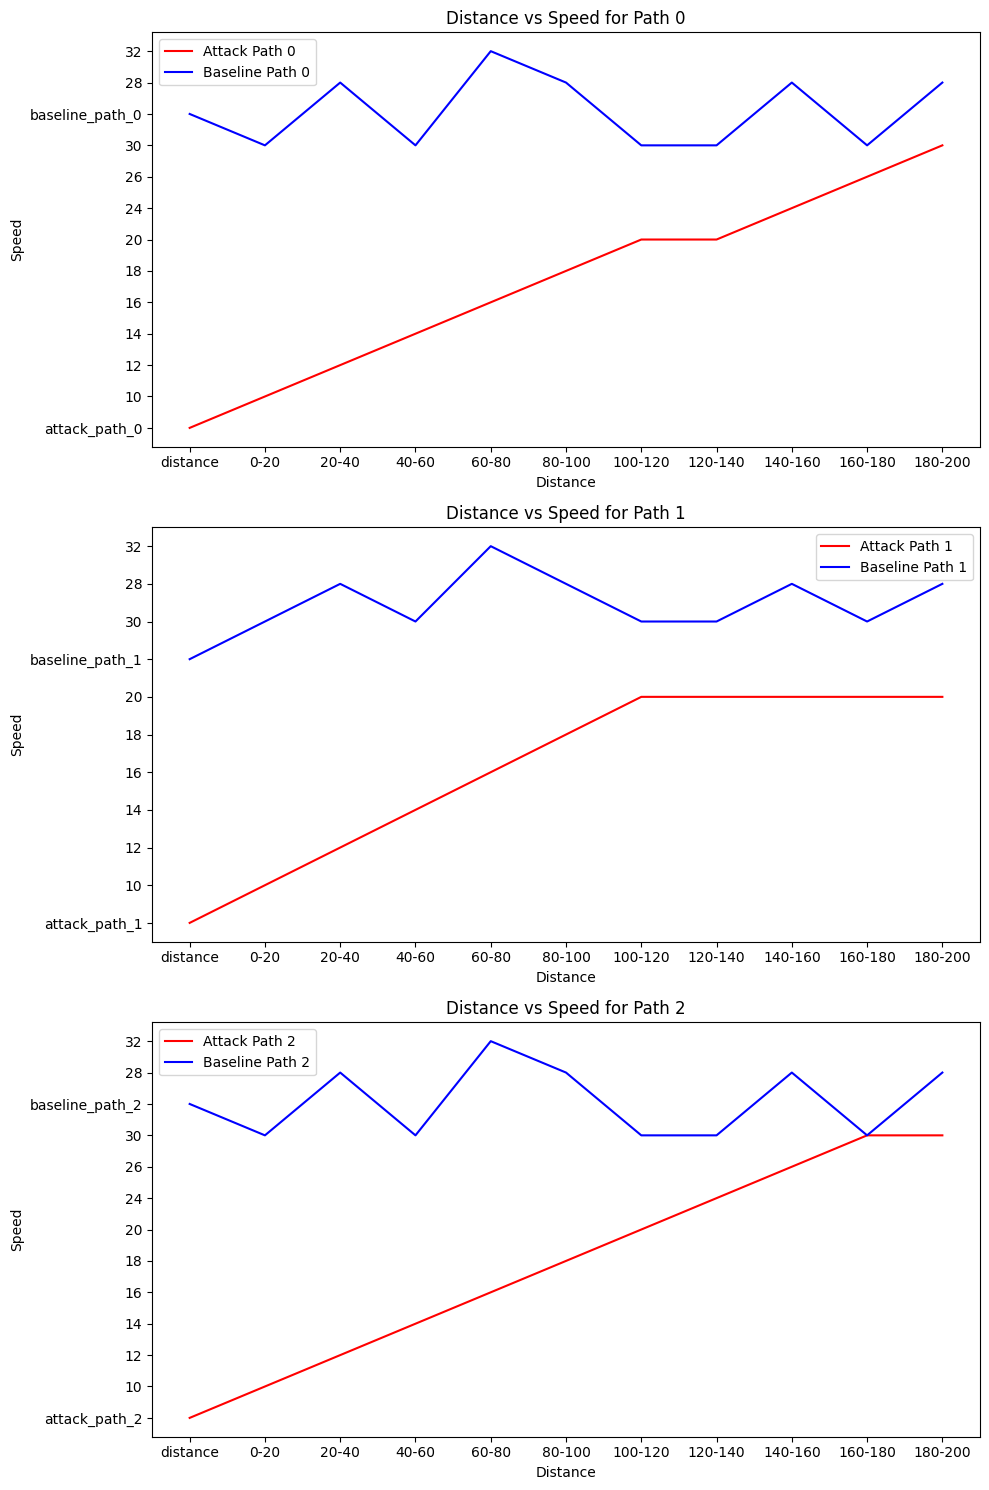

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from CSV, skipping the first column
data = pd.read_csv('Book3.csv', usecols=range(1, 8))
print(data.head())

# Renaming columns for ease of access
data.columns = ['distance', 'attack_path_0', 'attack_path_1', 'attack_path_2', 'baseline_path_0', 'baseline_path_1', 'baseline_path_2']

# Extracting data columns
distance = data['distance']
attack_path_0 = data['attack_path_0']
baseline_path_0 = data['baseline_path_0']
attack_path_1 = data['attack_path_1']
baseline_path_1 = data['baseline_path_1']
attack_path_2 = data['attack_path_2']
baseline_path_2 = data['baseline_path_2']

# Creating subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot for Path 0
axs[0].plot(distance, attack_path_0, label='Attack Path 0', color='red')
axs[0].plot(distance, baseline_path_0, label='Baseline Path 0', color='blue')
axs[0].set_title('Distance vs Speed for Path 0')
axs[0].set_xlabel('Distance')
axs[0].set_ylabel('Speed')
axs[0].legend()

# Plot for Path 1
axs[1].plot(distance, attack_path_1, label='Attack Path 1', color='red')
axs[1].plot(distance, baseline_path_1, label='Baseline Path 1', color='blue')
axs[1].set_title('Distance vs Speed for Path 1')
axs[1].set_xlabel('Distance')
axs[1].set_ylabel('Speed')
axs[1].legend()

# Plot for Path 2
axs[2].plot(distance, attack_path_2, label='Attack Path 2', color='red')
axs[2].plot(distance, baseline_path_2, label='Baseline Path 2', color='blue')
axs[2].set_title('Distance vs Speed for Path 2')
axs[2].set_xlabel('Distance')
axs[2].set_ylabel('Speed')
axs[2].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


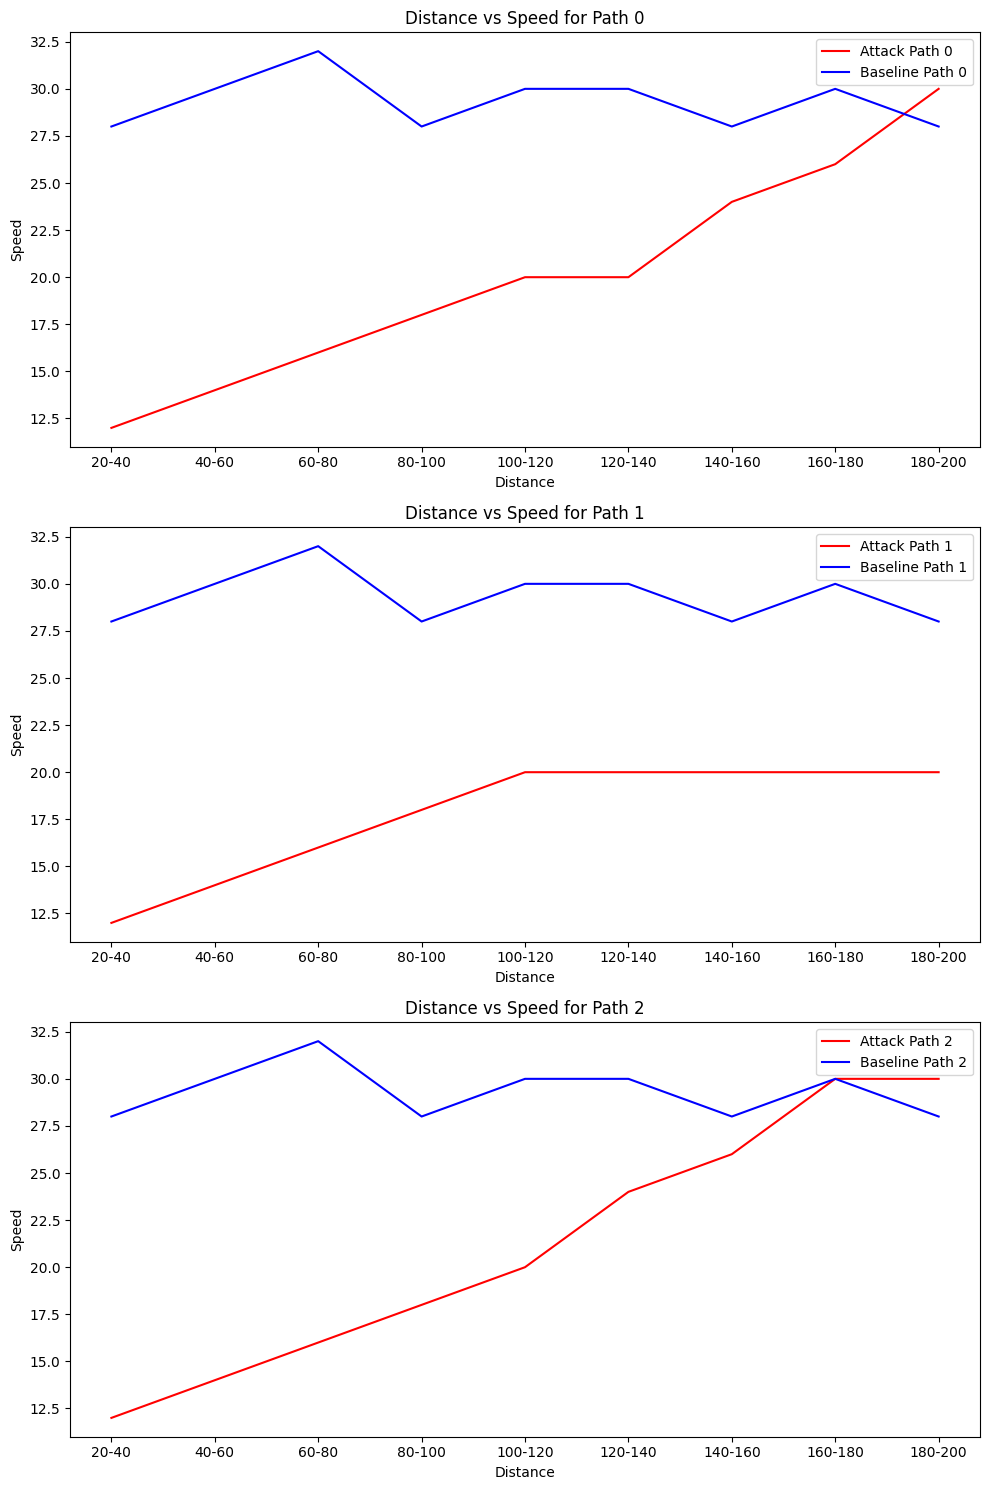

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from CSV, specify the header row, and skip any unnecessary rows
# Replace 'path_to_your_csv_file.csv' with your actual file path
# Adjust the skiprows number based on where your actual data starts
data = pd.read_csv('Book3.csv', header=1, skiprows=[2])

# Removing any unnamed columns if they exist
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Extracting data columns
distance = data['distance']
attack_path_0 = data['attack_path_0']
baseline_path_0 = data['baseline_path_0']
attack_path_1 = data['attack_path_1']
baseline_path_1 = data['baseline_path_1']
attack_path_2 = data['attack_path_2']
baseline_path_2 = data['baseline_path_2']

# Creating subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot for Path 0
axs[0].plot(distance, attack_path_0, label='Attack Path 0', color='red')
axs[0].plot(distance, baseline_path_0, label='Baseline Path 0', color='blue')
axs[0].set_title('Distance vs Speed for Path 0')
axs[0].set_xlabel('Distance')
axs[0].set_ylabel('Speed')
axs[0].legend()

# Plot for Path 1
axs[1].plot(distance, attack_path_1, label='Attack Path 1', color='red')
axs[1].plot(distance, baseline_path_1, label='Baseline Path 1', color='blue')
axs[1].set_title('Distance vs Speed for Path 1')
axs[1].set_xlabel('Distance')
axs[1].set_ylabel('Speed')
axs[1].legend()

# Plot for Path 2
axs[2].plot(distance, attack_path_2, label='Attack Path 2', color='red')
axs[2].plot(distance, baseline_path_2, label='Baseline Path 2', color='blue')
axs[2].set_title('Distance vs Speed for Path 2')
axs[2].set_xlabel('Distance')
axs[2].set_ylabel('Speed')
axs[2].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


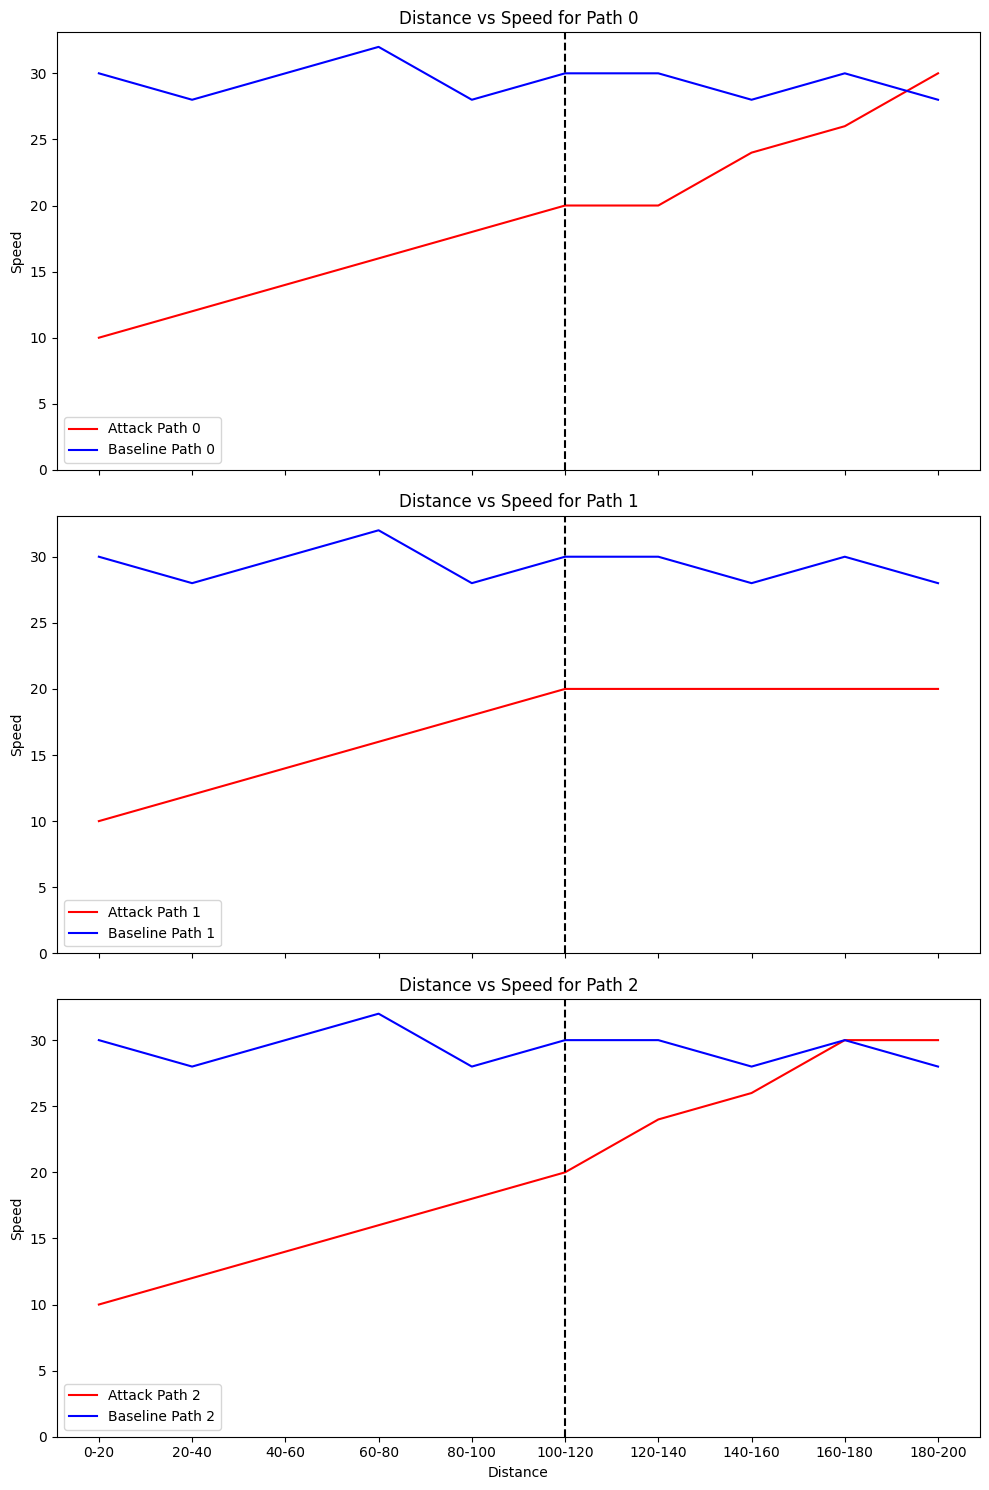

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data, assuming the CSV file is named 'speed_data.csv'
df = pd.read_csv('Book3.csv', skiprows=[0])  # Skip the first row which is header

# Define the distance segments (assuming they are the same for all paths)
distance_segments = df['distance'].tolist()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot each path
for i in range(3):
    attack_label = f'Attack Path {i}'
    baseline_label = f'Baseline Path {i}'
    axes[i].plot(distance_segments, df[f'attack_path_{i}'], 'r-', label=attack_label)
    axes[i].plot(distance_segments, df[f'baseline_path_{i}'], 'b-', label=baseline_label)
    axes[i].axvline(x=5, color='k', linestyle='--')  # x=5 because "100-120" is the 6th segment, python indexing starts from 0
    axes[i].set_ylim(bottom=0)  # Start y-axis from 0
    axes[i].set_ylabel('Speed')
    axes[i].legend()
    axes[i].set_title(f'Distance vs Speed for Path {i}')

# Set common labels
plt.xlabel('Distance')
# plt.xticks(rotation=90)  # Rotate x-ticks if necessary

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_110535/253315754.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[-1].set_xticklabels(distance_segments)  # Rotate x-ticks if necessary


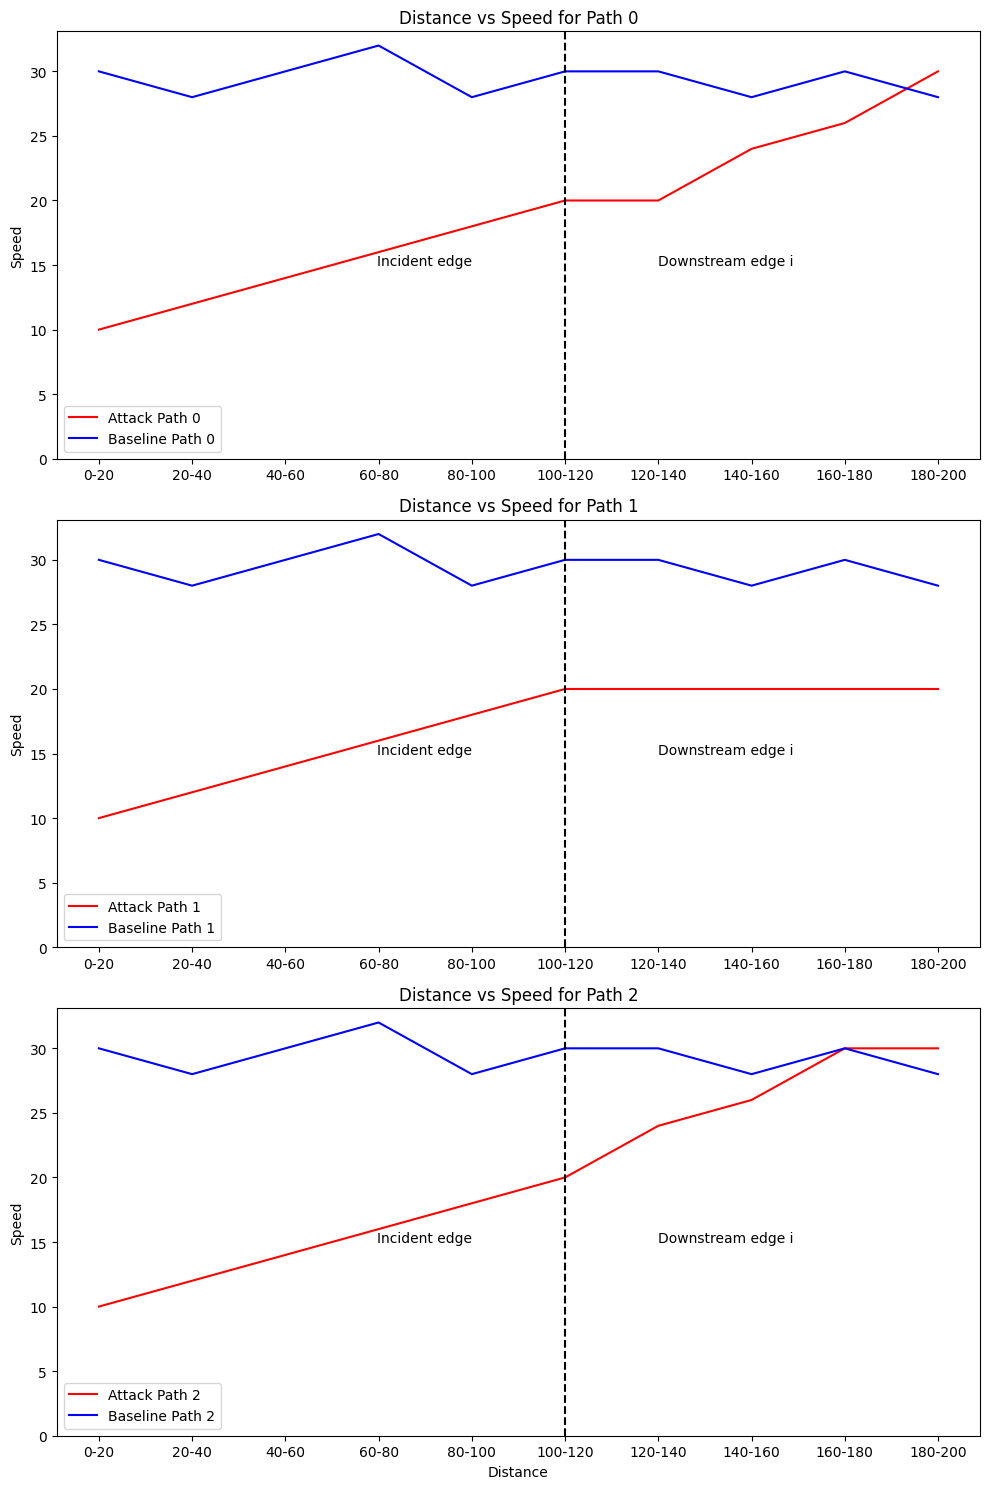

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data, assuming the CSV file is named 'speed_data.csv'
df = pd.read_csv('Book3.csv', skiprows=[0])  # Skip the first row which is header

# Define the distance segments (assuming they are the same for all paths)
distance_segments = df['distance'].tolist()

# Create subplots without sharing x-axis
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=False)

# Define the position of the vertical line (index of "100-120" segment)
vertical_line_index = distance_segments.index("100-120")

# Plot each path and add texts
for i in range(3):
    attack_label = f'Attack Path {i}'
    baseline_label = f'Baseline Path {i}'
    axes[i].plot(distance_segments, df[f'attack_path_{i}'], 'r-', label=attack_label)
    axes[i].plot(distance_segments, df[f'baseline_path_{i}'], 'b-', label=baseline_label)
    axes[i].axvline(x=vertical_line_index, color='k', linestyle='--')  # Add vertical line
    axes[i].set_ylim(bottom=0)  # Start y-axis from 0
    axes[i].set_ylabel('Speed')
    axes[i].legend()
    axes[i].set_title(f'Distance vs Speed for Path {i}')

    # Add custom text on either side of the dotted line
    axes[i].text(vertical_line_index - 1, 15, 'Incident edge', ha='right')
    axes[i].text(vertical_line_index + 1, 15, 'Downstream edge i', ha='left')

# Set common x-axis labels for the bottom subplot
axes[-1].set_xlabel('Distance')
axes[-1].set_xticklabels(distance_segments)  # Rotate x-ticks if necessary

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


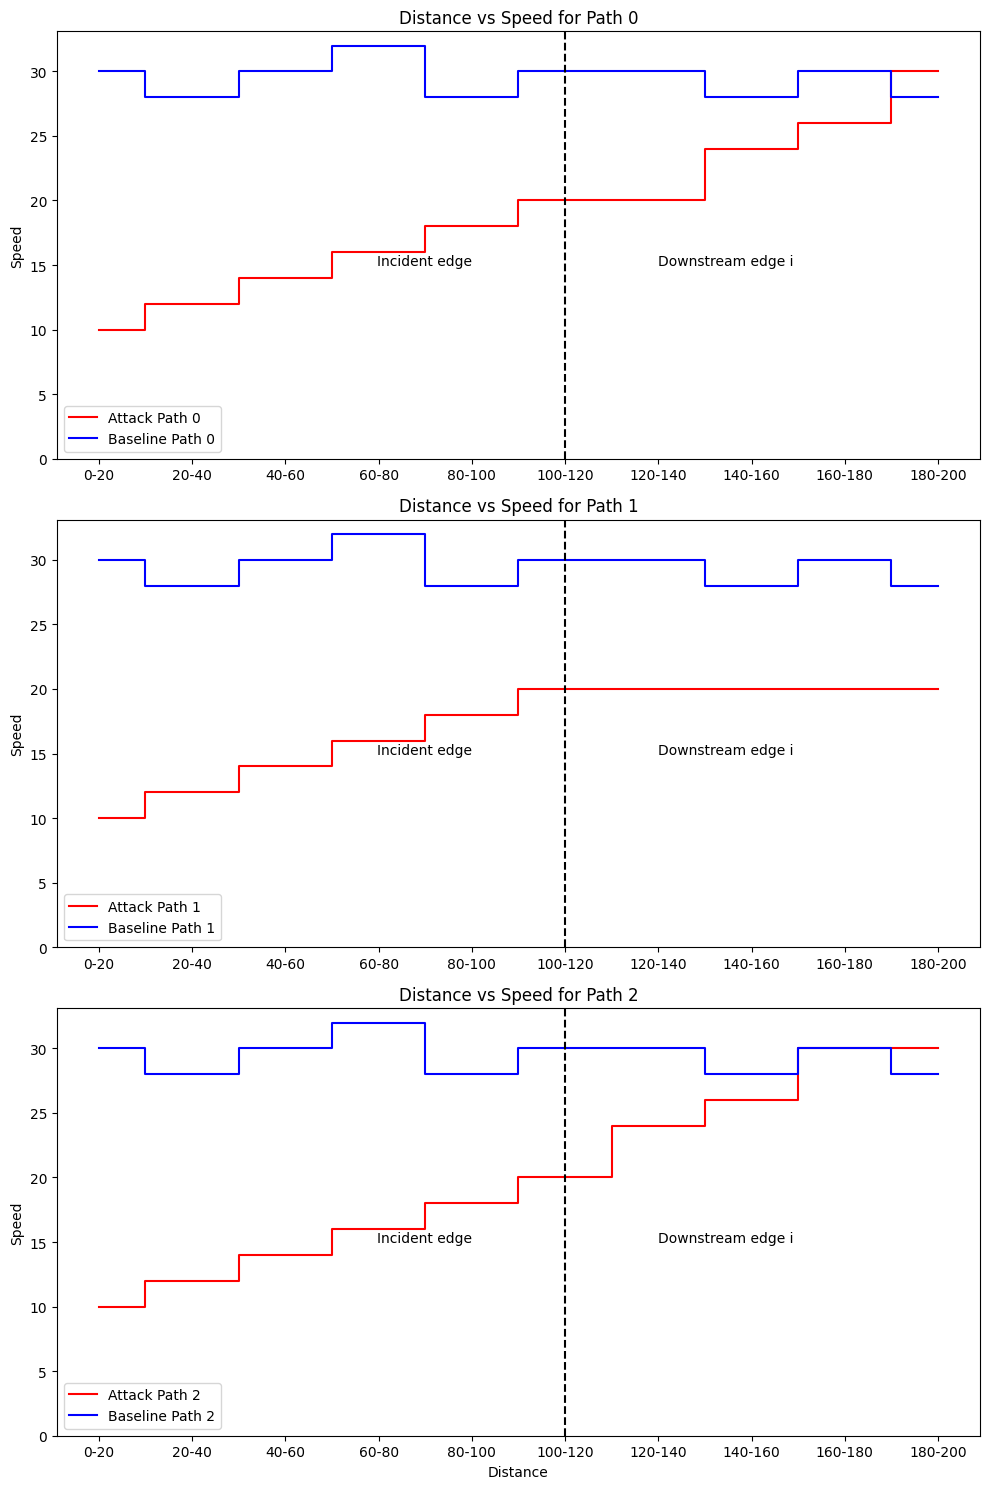

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data, assuming the CSV file is named 'Book3.csv'
df = pd.read_csv('Book3.csv', skiprows=[0])  # Skip the first row which is header

# Define the distance segments (assuming they are the same for all paths)
distance_segments = df['distance'].tolist()

# Create subplots without sharing x-axis
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=False)

# Define the position of the vertical line (index of "100-120" segment)
vertical_line_index = distance_segments.index("100-120")

# Plot each path and add texts
for i in range(3):
    attack_label = f'Attack Path {i}'
    baseline_label = f'Baseline Path {i}'
    
    # Use step function for attack and baseline paths
    axes[i].step(distance_segments, df[f'attack_path_{i}'], 'r-', label=attack_label, where='mid')
    axes[i].step(distance_segments, df[f'baseline_path_{i}'], 'b-', label=baseline_label, where='mid')
    
    axes[i].axvline(x=vertical_line_index, color='k', linestyle='--')  # Add vertical line
    axes[i].set_ylim(bottom=0)  # Start y-axis from 0
    axes[i].set_ylabel('Speed')
    axes[i].legend()
    axes[i].set_title(f'Distance vs Speed for Path {i}')

    # Add custom text on either side of the dotted line
    axes[i].text(vertical_line_index - 1, 15, 'Incident edge', ha='right')
    axes[i].text(vertical_line_index + 1, 15, 'Downstream edge i', ha='left')

# Set common x-axis labels for the bottom subplot
axes[-1].set_xlabel('Distance')
axes[-1].set_xticks(range(len(distance_segments)))  # Set x-ticks positions
axes[-1].set_xticklabels(distance_segments)  # Set x-ticks labels and rotate

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
